In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

In [2]:
egdi = pd.read_csv('EGOV_DATA_2024.csv')

In [3]:
wgi = pd.read_excel('wgidataset.xlsx')

In [4]:
mapa = gpd.read_file('ne_110m_admin_0_countries')

In [5]:
rl = wgi.loc[wgi['indicator'] == 'rl']

In [6]:
rl = rl.iloc[:, [2, 8]]

In [7]:
rl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5350 entries, 642 to 31671
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   countryname  5350 non-null   object
 1   pctrank      5350 non-null   object
dtypes: object(2)
memory usage: 125.4+ KB


In [8]:
rl = rl.replace({
    '..': np.nan
})

C:\Users\lazar\AppData\Local\Temp\ipykernel_13000\3067788708.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rl = rl.replace({


In [9]:
rl['countryname'] = rl['countryname'].replace({
    'Georgia': 'Georgia (Country)',
    'Bahamas, The': 'Bahamas',
    'Gambia, The': 'Gambia',
    'Lao PDR': "Lao People's Democratic Republic",
    'Cape Verde': 'Cabo Verde',
    'Korea, Rep.': 'Republic of Korea',
    'Moldova': 'Republic of Moldova',
    'Slovak Republic': 'Slovakia',
    'Venezuela, RB': 'Venezuela',
    'Congo, Rep.': 'Congo',
    'Kyrgyz Republic': 'Kyrgyzstan',
    'Yemen, Rep.': 'Yemen',
    'Micronesia, Fed. Sts.': 'Micronesia (Federated States of)',
    'United Kingdom': 'United Kingdom of Great Britain and Northern Ireland',
    'Tanzania':  'United Republic of Tanzania',
    'United States': 'United States of America',
    'St. Kitts and Nevis': 'Saint Kitts and Nevis',
    'St. Lucia': 'Saint Lucia',
    'St. Vincent and the Grenadines': 'Saint Vincent and the Grenadines',
    'Egypt, Arab Rep.': 'Egypt',
    "Korea, Dem. Rep.": "Democratic People's Republic of Korea",
    'Congo, Dem. Rep.': 'Democratic Republic of the Congo',
    'Iran, Islamic Rep.': 'Iran (Islamic Republic of)',
    'São Tomé and Principe': 'Sao Tome and Principe'
})

In [10]:
mapa['SOVEREIGNT'] = mapa['SOVEREIGNT'].replace({
    'eSwatini': 'Eswatini', 
    'Iran': 'Iran (Islamic Republic of)',
    'Georgia': 'Georgia (Country)',
    'Ivory Coast': "Côte d'Ivoire",
    'East Timor': 'Timor-Leste',
    'Laos': 'Lao People\'s Democratic Republic',
    'Czechia': 'Czech Republic',
    'Republic of Serbia': 'Serbia',
    'Republic of the Congo': 'Congo',
    'Russia': 'Russian Federation',
    'Brunei': 'Brunei Darussalam',
    'Moldova': 'Republic of Moldova',
    'South Korea': 'Republic of Korea',
    "North Korea": "Democratic People's Republic of Korea",
    'Syria': 'Syrian Arab Republic',
    'The Bahamas': 'Bahamas',
    'Turkey': 'Türkiye',
    'Vietnam': 'Viet Nam',
    'United Kingdom': 'United Kingdom of Great Britain and Northern Ireland'
})

In [11]:
df = mapa.merge(rl, left_on='SOVEREIGNT', right_on='countryname')

In [12]:
df = gpd.GeoDataFrame(df)

In [13]:
df.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,countryname,pctrank
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",Fiji,61.809044
1,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",Fiji,62.500000
2,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",Fiji,41.791046
3,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",Fiji,54.228855
4,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",Fiji,52.736317


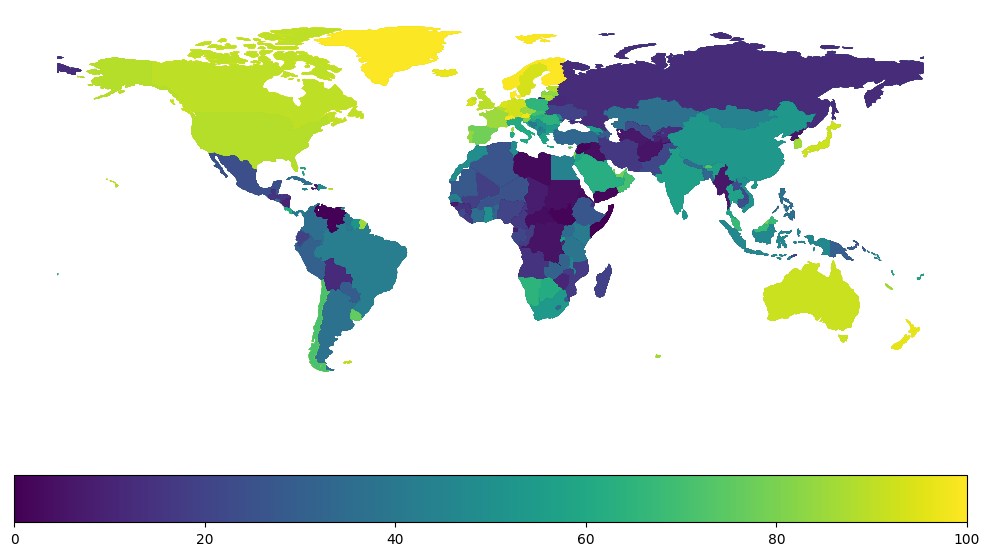

In [15]:
ax = df.plot(
    column='pctrank',
    figsize=(10, 6),
    legend=True,
    legend_kwds={
        'orientation': 'horizontal'
    },
    vmin=0,
    vmax=100
)

ax.axis('off')

fig = ax.get_figure()
fig.tight_layout()
fig.savefig('C:/Users/lazar/Dissertacao-Mestrado-PoderJud-EGDI/figuras/mapa_coropletico_wgi_rl.png', dpi=300, bbox_inches='tight')